In [34]:
#%%
import math
import numpy as np
import inspect
import importlib

import scipy.interpolate

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.offline import plot
pio.renderers.default = "svg"

import sys
import os
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
#sys.path.append(os.path.dirname(parent_directory))
#sys.path.append(os.path.dirname(os.path.dirname(parent_directory)))

import IoT_node_models
import Node_analysis as nd

path_to_save_svg = "Saved_Data"


importlib.reload(nd)

<module 'Node_analysis' from 'd:\\Pol\\Documents\\Research\\Paper\\Git_Iot_node_modeling\\Tests\\Node_analysis.py'>

In [35]:
node_LDO = LDO(name = "Node LDO", v_out = 3.3, i_q = 1e-3, v_in = 3.3, module_list = module_List_3V3)
node_Batt= Battery(name = "Node Batt.", v = 3.3, capacity_mAh = 1800, i = 0, selfdischarge_p_year = 5)


node_lora = LoRa_Node(name= "IoT Node", module_list= module_List_3V3, PMU_composition =[node_LDO], Battery = node_Batt, MCU_module   = apollo_module_3V3, radio_module = radio_module_3V3)

node = LoRa_Node_profile("Node_profile", node_lora, MCU_active_state = apollo_state_active_3V3,
                radio_state_TX=radio_state_TX_3V3, radio_state_RX= radio_state_RX_3V3, Ptx = 2)
                
    

node.set_radio_parameters(SF=7 ,Coding=1,Header=True,DE = None,BW = 125e3, Payload = 50) 
node.set_TX_Power_config( P_TX= PTX_PABOOST_configured, I_TX=I_PABoost_3V3)  
node.set_TX_Power(Ptx = 17)
node.change_RX_duration(1e-3)

node.change_task_rate(node.task_rx,24*60*(60/6))
node.change_task_rate(node.task_tx,24*4)
node.add_task(task_TPHG_3V3,24*12)

In [36]:
def PL_model(d):
    return path_loss_PLd0(d=d, PLd0=94.40,d0=1, n=2.03)

In [37]:
figsize = (6,5)

-------------------------------------------------
            Tasks summary                        
-------------------------------------------------
Task name            : Sleep          TX             RX             TPHG meas.     
Times/day    [1/d]   : 1              96             14400.0        288            
Tot. durat.  [s]     : 81187.0138     249.7874       4334.4000      628.7988       
Tot. en./d   [mJ]    : 9678.1658      64856.2648     9182.5820      23488.9315     
Node en./d   [mJ]    : 107205.9441     
Average pow. [mW]    : 1.2408          
-------------------------------------------------
-----------------------------------------------------------------
                        Module summary                           
-----------------------------------------------------------------
Module       State        Active [s]   Energy [mJ]  Av. Cur.[uA]  
Apollo3                   4964.1607    10118.1323   35.4873       
     -       Sleep        81435.8393   731.4008     

[1.2408095380748798, 0.5305750787718796]

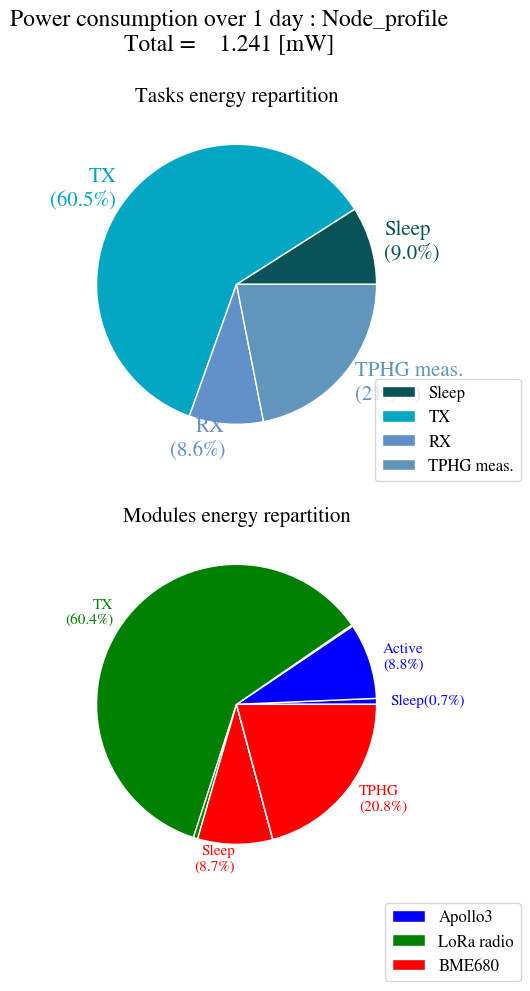

In [38]:
nd.node_power(Node=node, d= 1500 ,PL_model=PL_model, PTX=PTX_PABOOST_configured , I_PTX=I_PABoost_3V3, doPlot = True,verbose=True)

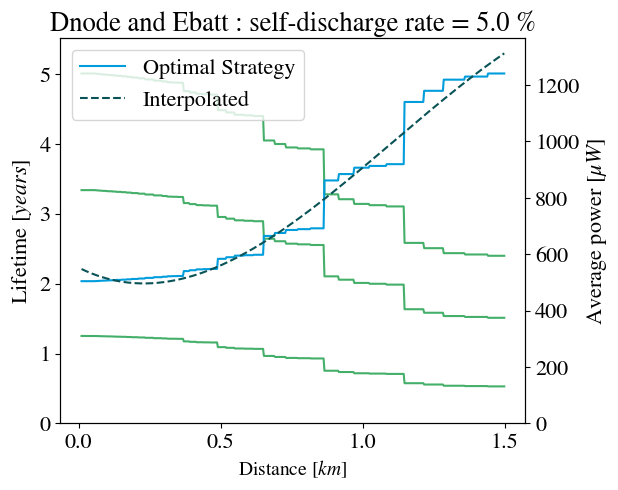

In [39]:
nd.sweep_dnode(Node=node, 
            dmax=1500, 
            d_step=3 ,
            nAA = [1,3,5],
            PL_model=PL_model, 
            PTX=PTX_PABOOST_3V3 , 
            I_PTX=I_PABoost_3V3,
            filename =os.path.join(path_to_save_svg , "Lifetime_dnode_Ebatt"),
            figsize=figsize)


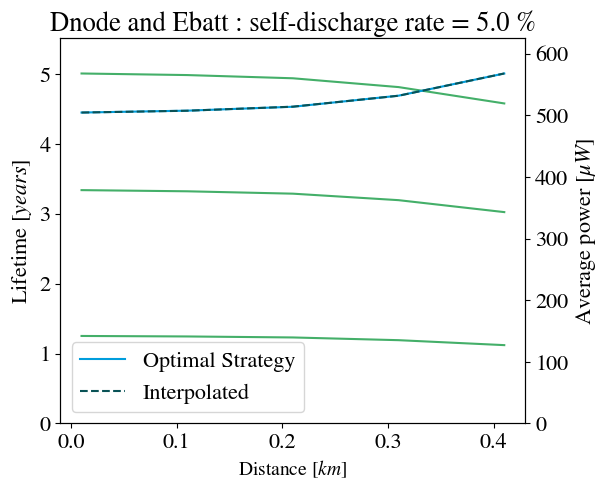

In [40]:
nd.sweep_dnode(Node=node, 
            dmax=500, 
            d_step=100 ,
            nAA = [1,3,5],
            PL_model=PL_model, 
            PTX=PTX_PABOOST_configured[:15] , 
            I_PTX=I_PABoost_3V3[:15] ,
            filename =os.path.join(path_to_save_svg , "Lifetime_dnode_Ebatt2"),
            figsize=figsize)


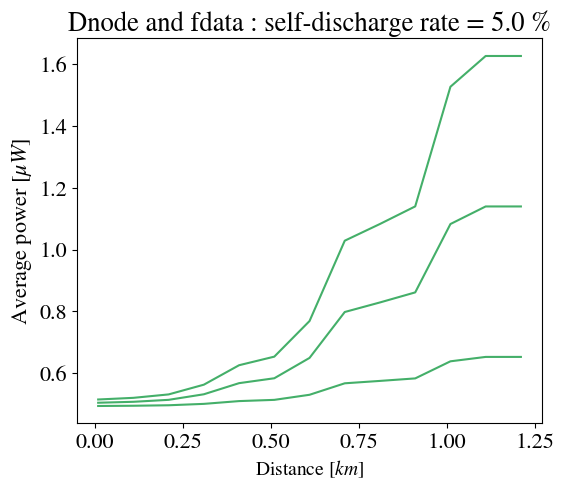

In [41]:
nd.sweep_dnode_fdata(Node=node, 
                    dmax=1300, 
                    d_step=100,
                    fdata = [24,24+3*24,24+6*24], 
                    Task_tx = node.task_tx,
                    PL_model=PL_model, 
                    PTX=PTX_PABOOST_configured[:15] , 
                    I_PTX=I_PABoost_3V3[:15] ,filename =os.path.join(path_to_save_svg , "Lifetime_dnode_fdata"),
                    figsize=figsize)


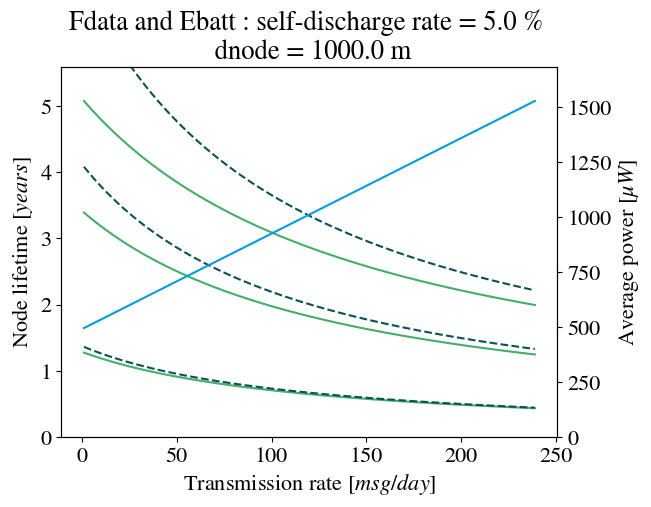

In [42]:
nd.sweep_fdata(Node=node, 
            fmax=24*10, 
            f_step=1, 
            Task_tx = node.task_tx,
            d = 1000,
            nAA = [1,3,5],
            PL_model=PL_model, 
            PTX=PTX_PABOOST_3V3 , 
            I_PTX=I_PABoost_3V3,
            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt"),
            figsize=figsize) 
    

-------------------------------------------------
            Tasks summary                        
-------------------------------------------------
Task name            : Sleep          TX             RX             TPHG meas.     
Times/day    [1/d]   : 1              96             14400.0        288            
Tot. durat.  [s]     : 81187.0138     249.7874       4334.4000      628.7988       
Tot. en./d   [mJ]    : 9678.1658      62967.4855     9182.5820      23488.9315     
Node en./d   [mJ]    : 105317.1649     
Average pow. [mW]    : 1.2189          
-------------------------------------------------
-----------------------------------------------------------------
                        Module summary                           
-----------------------------------------------------------------
Module       State        Active [s]   Energy [mJ]  Av. Cur.[uA]  
Apollo3                   4964.1607    10118.1323   35.4873       
     -       Sleep        81435.8393   731.4008     

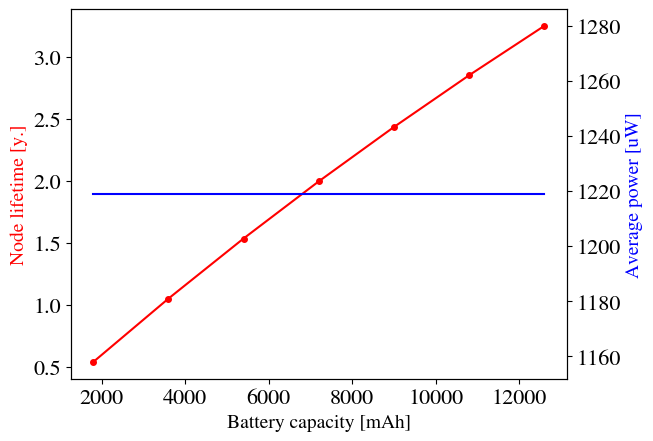

In [43]:
nd.sweep_ebatt(Node=node, 
                nAAmax = 8,
                d = 1300,
                PL_model=PL_model, 
                PTX=PTX_PABOOST_3V3 , 
                I_PTX=I_PABoost_3V3)
    

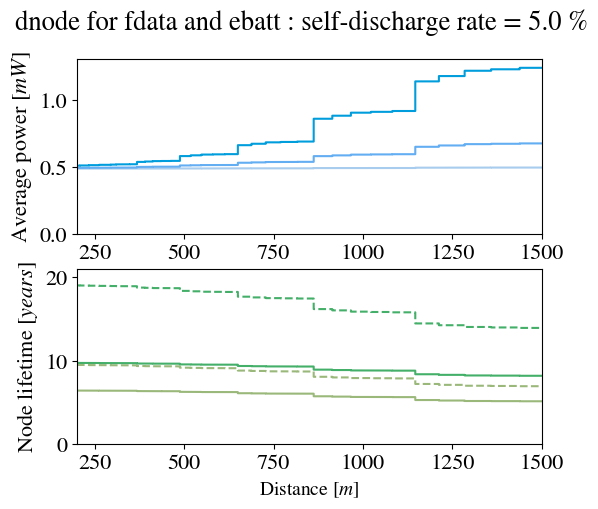

In [44]:
nd.sweep_dnode_fdata_Ebatt( Node=node,
                            dmin = 200, 
                            dmax=1500, 
                            d_step=2,
                            f_batt = 24,
                            fdata = [1,24, 24*4],
                            nAA = [1,2], 
                            Task_tx = node.task_tx, 
                            PL_model=PL_model, 
                            PTX=PTX_PABOOST_3V3 , 
                            I_PTX=I_PABoost_3V3,
                            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt_dnode"),
                            figsize=figsize) 
    

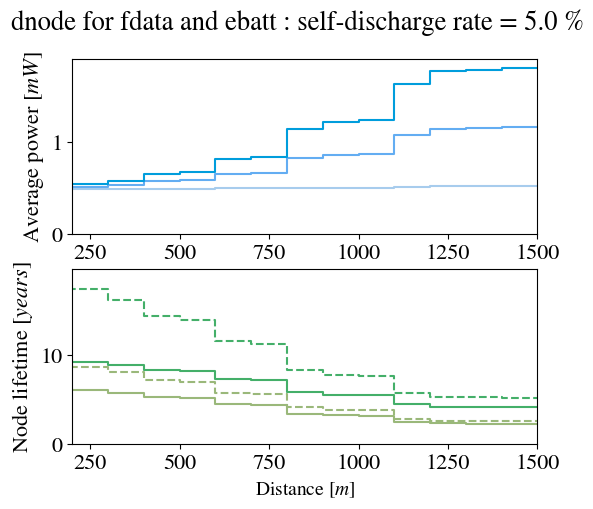

In [45]:
nd.sweep_dnode_fdata_Ebatt( Node=node,
                            dmin = 200, 
                            dmax=1500, 
                            d_step=100,
                            f_batt = 24*7,
                            fdata = [4,86,168],
                            nAA = [1,2], 
                            Task_tx = node.task_tx, 
                            PL_model=PL_model, 
                            PTX=PTX_PABOOST_3V3 , 
                            I_PTX=I_PABoost_3V3,
                            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt_dnode"),
                            figsize=figsize) 
